In [1]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Conv2D, AveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
import numpy as np

# Architecture

In [3]:
class LeNet(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.c1 = Conv2D(6, kernel_size = 5, activation='tanh')
        self.s1 = AveragePooling2D(pool_size = 2, strides = 2)
        self.c2 = Conv2D(16, kernel_size = 5, activation='tanh')
        self.s2 = AveragePooling2D(pool_size = 2, strides = 2)
        self.flatten = Flatten()
        self.f1 = Dense(120, activation='sigmoid')
        self.f2 = Dense(84, activation='sigmoid')
        self.f3 = Dense(10, activation='sigmoid')

    def call(self, inputs):
        inputs = self.c1(inputs)
        inputs = self.s1(inputs)
        inputs = self.c2(inputs)
        inputs = self.s2(inputs)
        inputs = self.flatten(inputs)
        inputs = self.f1(inputs)
        inputs = self.f2(inputs)
        inputs = self.f3(inputs)
        return inputs

# Test

In [5]:
from tensorflow.keras.datasets import mnist

(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()
X_train_full = np.expand_dims(X_train_full, axis=-1)
X_test_full = np.expand_dims(X_test_full, axis=-1)
X_train_full, X_test = X_train_full / 255., X_test_full / 255.
X_train, X_valid = X_train_full[:55000], X_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:]

In [7]:
X_train_full.shape

(60000, 28, 28, 1)

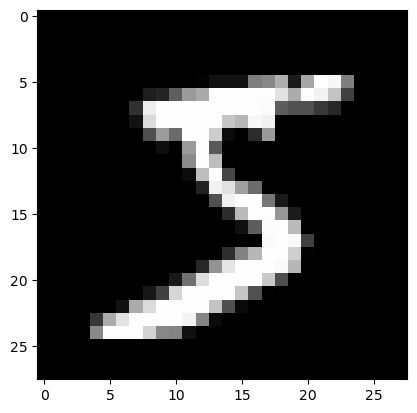

In [9]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='grey')

In [11]:
lenet = LeNet()
lenet.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='tb_callback_dir', histogram_freq=1)

In [12]:
history = lenet.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_valid, y_valid), callbacks=tb_callback)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7829 - loss: 0.7934 - val_accuracy: 0.9704 - val_loss: 0.1083
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9658 - loss: 0.1150 - val_accuracy: 0.9806 - val_loss: 0.0702
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9804 - loss: 0.0640 - val_accuracy: 0.9820 - val_loss: 0.0616
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9849 - loss: 0.0507 - val_accuracy: 0.9842 - val_loss: 0.0553
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9874 - loss: 0.0428 - val_accuracy: 0.9854 - val_loss: 0.0564


<Axes: >

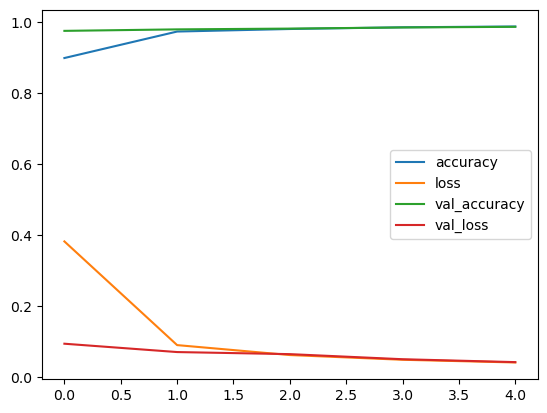

In [18]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [20]:
lenet.summary()

Model: "le_net_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,280 (520.63 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,854 (347.09 KB)